In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!nvidia-smi

Thu Mar 10 13:35:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    33W / 250W |    375MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import Dropout

In [ ]:
train_dir = '/content/drive/MyDrive/Datasets/PlantVillage/train'
validation_dir= '/content/drive/MyDrive/Datasets/PlantVillage/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (
                train_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical")
validation_generator = test_datagen.flow_from_directory (
                validation_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical")

Found 43444 images belonging to 38 classes.
Found 10871 images belonging to 38 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',
         input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(38,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
from tensorflow.keras import optimizers

model.compile (loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
r  = model.fit_generator(
train_generator,
validation_data=validation_generator,
epochs=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/30
1358/1358 [==============================] - 18150s 13s/step - loss: 1.6117 - acc: 0.5580 - true_positives: 17336.0000 - true_negatives: 1603410.0000 - false_positives: 4018.0000 - false_negatives: 26108.0000 - precision: 0.8118 - recall: 0.3990 - val_loss: 0.9165 - val_acc: 0.7250 - val_true_positives: 6726.0000 - val_true_negatives: 400937.0000 - val_false_positives: 1290.0000 - val_false_negatives: 4145.0000 - val_precision: 0.8391 - val_recall: 0.6187
Epoch 2/30
1358/1358 [==============================] - 183s 135ms/step - loss: 0.7942 - acc: 0.7649 - true_positives: 29678.0000 - true_negatives: 1602644.0000 - false_positives: 4784.0000 - false_negatives: 13766.0000 - precision: 0.8612 - recall: 0.6831 - val_loss: 0.6019 - val_acc: 0.8118 - val_true_positives: 8136.0000 - val_true_negatives: 401205.0000 - val_false_positives: 1022.0000 - val_false_negatives: 2735.0000 - val_precision: 0.8884 - val_recall: 0.7484
Epoch 3/30
1358/1358 [==============================] - 18

In [ ]:
from tensorflow.keras.models import load_model

model.save('custom_multi_leaf_disease.h5')
model.save('custom_multi_leaf')

INFO:tensorflow:Assets written to: custom_multi_leaf/assets


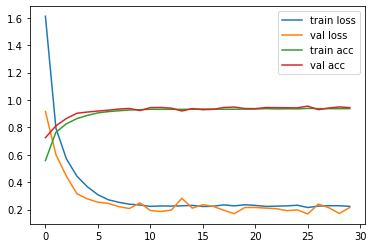

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [ ]:
test_dir = '/content/drive/MyDrive/Datasets/PlantVillage/val'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical")

Found 10871 images belonging to 38 classes.


In [ ]:
model.evaluate(test_generator)

340/340 [==============================] - 36s 107ms/step - loss: 0.2155 - acc: 0.9445 - true_positives: 10232.0000 - true_negatives: 401679.0000 - false_positives: 548.0000 - false_negatives: 639.0000 - precision: 0.9492 - recall: 0.9412


[0.21554096043109894,
 0.9445313215255737,
 10232.0,
 401679.0,
 548.0,
 639.0,
 0.9491651058197021,
 0.9412197470664978]

In [ ]:
test_dir = '/content/drive/MyDrive/Datasets/PlantVillage/val'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="categorical",
                shuffle= False)

Found 10871 images belonging to 38 classes.


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred1 = model.predict(test_generator)
y_pred1=np.argmax(y_pred1,axis=1)
print(y_pred1)

y_true=np.expand_dims(test_generator.classes, axis=1)
print(y_true)

print(classification_report(test_generator.classes, y_pred1))

[ 0  2  0 ... 33 37 37]
[[ 0]
 [ 0]
 [ 0]
 ...
 [37]
 [37]
 [37]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       126
           1       1.00      0.87      0.93       125
           2       0.96      0.95      0.95        55
           3       0.95      0.91      0.93       329
           4       0.94      0.98      0.96       300
           5       0.98      0.97      0.97       210
           6       1.00      0.88      0.94       170
           7       0.83      0.74      0.78       103
           8       0.99      0.98      0.99       239
           9       0.83      0.92      0.88       197
          10       1.00      0.82      0.90       233
          11       0.91      0.98      0.95       236
          12       1.00      0.93      0.96       276
          13       0.96      1.00      0.98       215
          14       0.99      0.92      0.95        84
          15       0.99      1.00      0.99      1112
          16   

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_generator.classes, y_pred1)
print(cm)

[[ 100    0    2 ...    0    0    0]
 [   3  109    0 ...    0    0    0]
 [   0    0   52 ...    0    0    0]
 ...
 [   0    0    0 ... 1065    0    0]
 [   0    0    0 ...    0   65    0]
 [   0    0    0 ...    0    0  307]]


[[ 100    0    2 ...    0    0    0]
 [   3  109    0 ...    0    0    0]
 [   0    0   52 ...    0    0    0]
 ...
 [   0    0    0 ... 1065    0    0]
 [   0    0    0 ...    0   65    0]
 [   0    0    0 ...    0    0  307]]


(<Figure size 1656x1656 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f39804bcad0>)

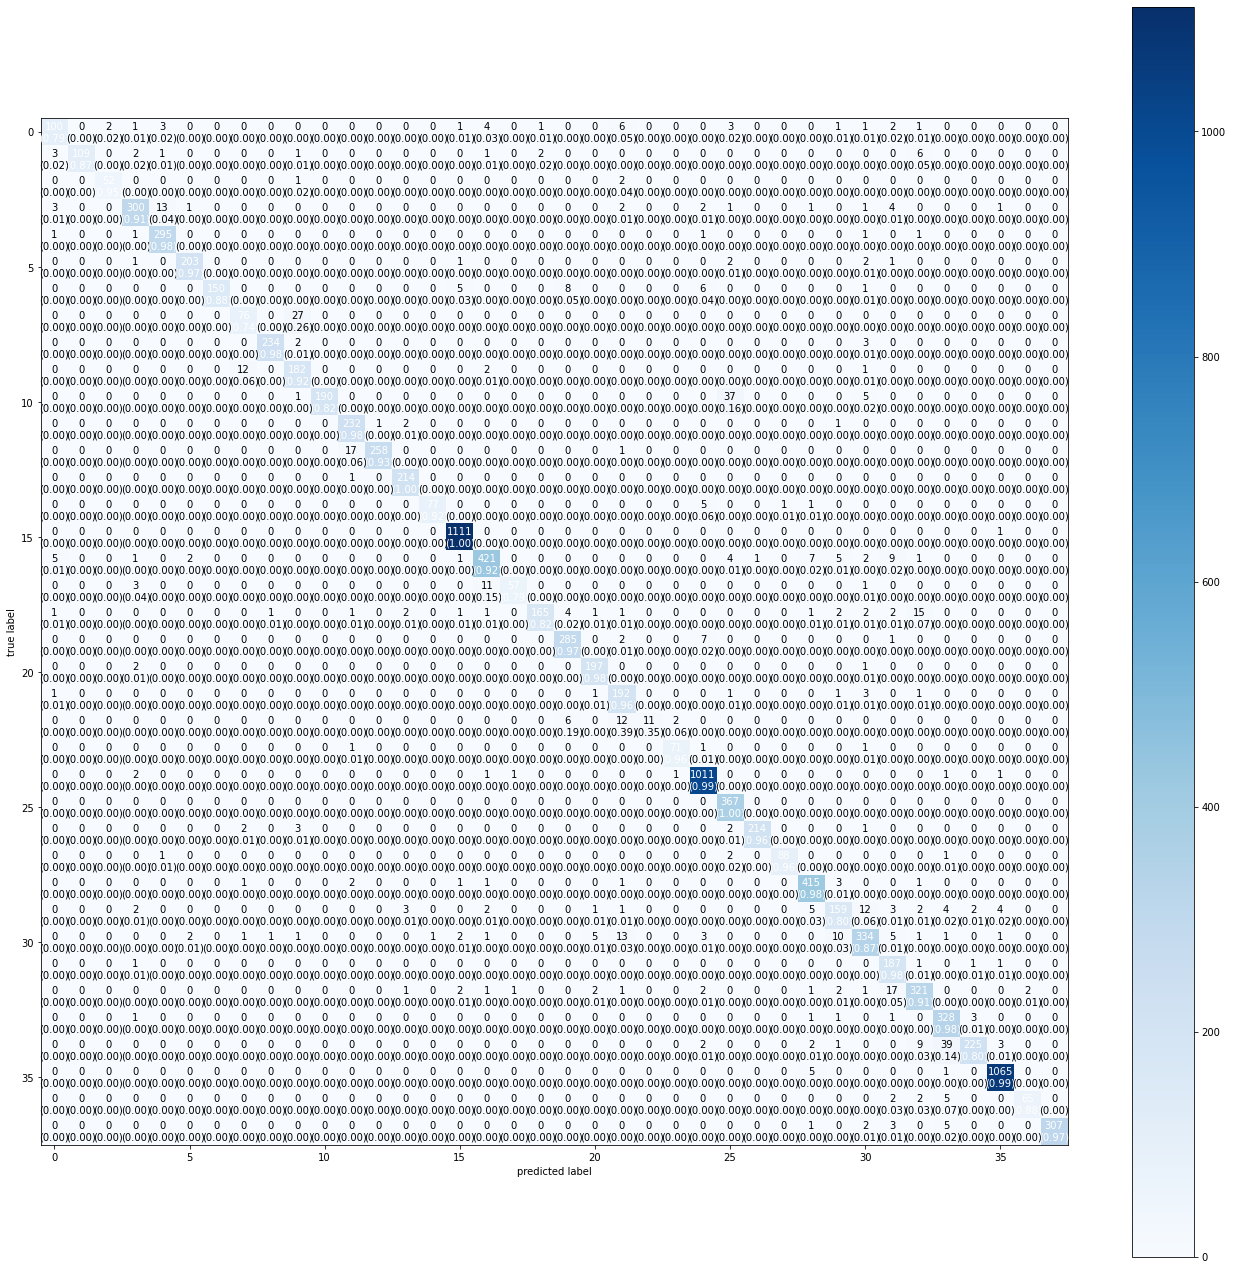

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
#from mlxtend.plotting import heatmap
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_generator.classes, y_pred1)
print(cm)
plot_confusion_matrix(cm,figsize=(23,23),show_normed=True,show_absolute=True,colorbar=True)

[[ 100    0    2 ...    0    0    0]
 [   3  109    0 ...    0    0    0]
 [   0    0   52 ...    0    0    0]
 ...
 [   0    0    0 ... 1065    0    0]
 [   0    0    0 ...    0   65    0]
 [   0    0    0 ...    0    0  307]]


(<Figure size 1656x1656 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f38373b2090>)

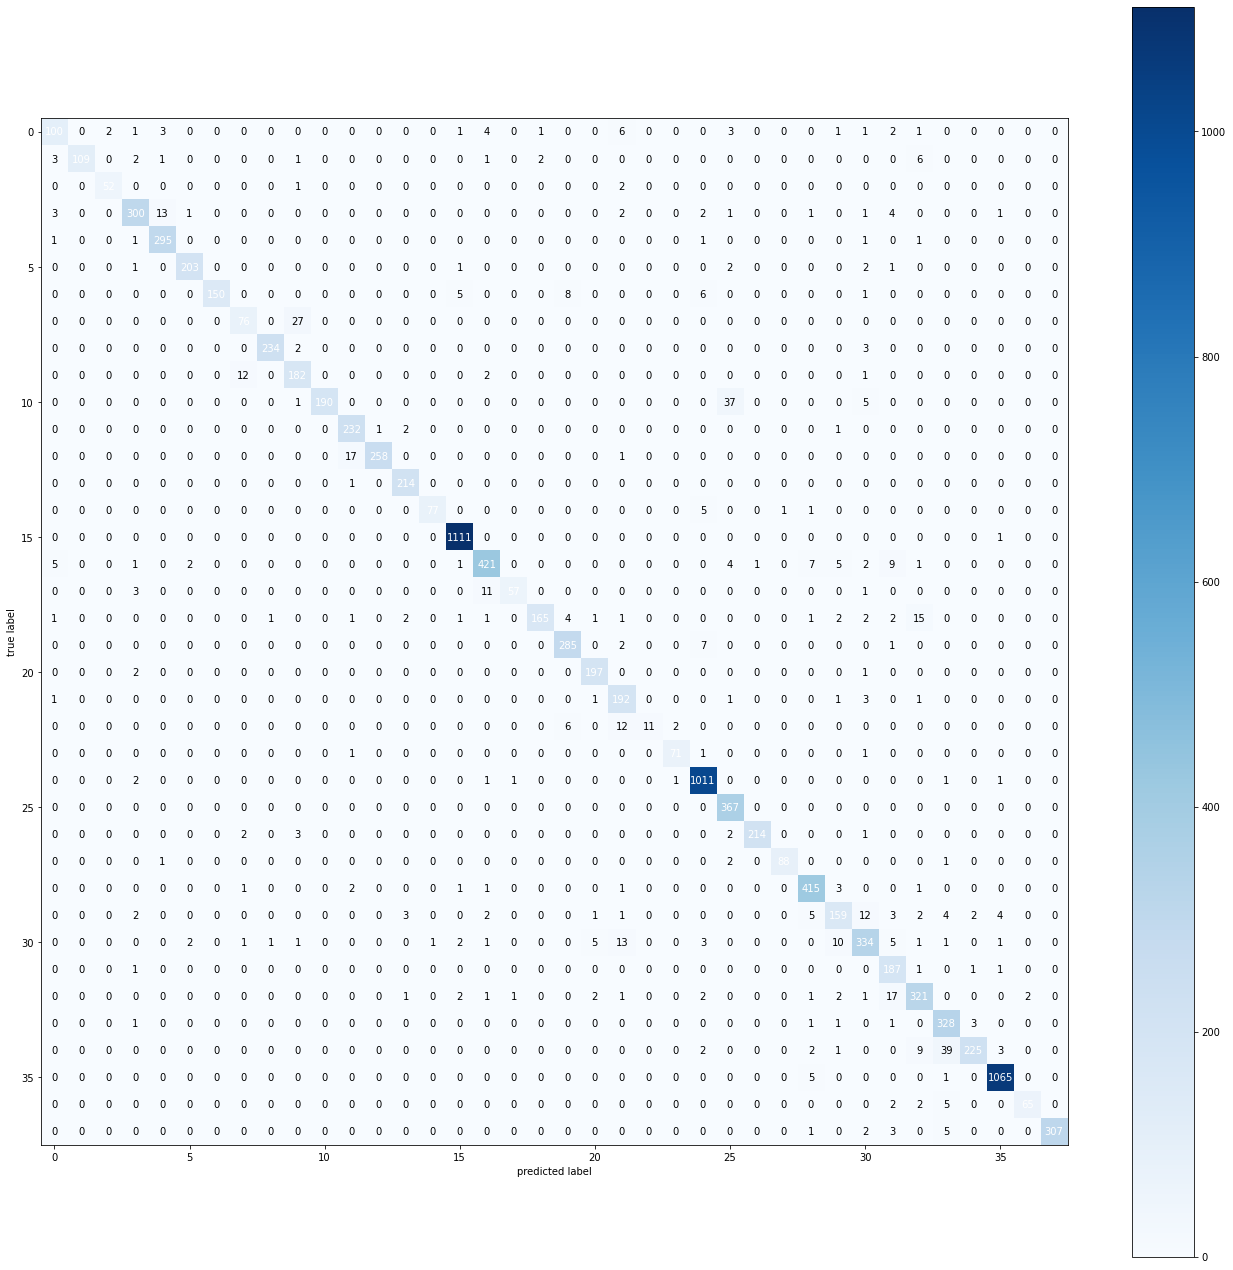

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_generator.classes, y_pred1)
print(cm)
plot_confusion_matrix(cm,figsize=(23,23),show_normed=False,show_absolute=True,colorbar=True)

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = np.sum(cm) - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print("False Positive")
print(FP)
print(FP.sum(axis=0))
print("False Negative")
print(FN)
print(FN.sum(axis=0))
print("True Positive")
print(TP)
print(TP.sum(axis=0))
print("True Negative")
print(TN)
print(TN.sum(axis=0))
print(ACC)
print("Specificity")
print(TNR)
print(TNR.sum(axis=0))
print("Sensitivity")
print(TPR)
print(TPR.sum(axis=0))
np.diag(cm)

False Positive
[14  0  2 17 18  5  0 16  2 36  0 22  1  8  1 14 25  2  3 18 10 42  0  3
 29 52  1  1 25 27 41 50 41 57  6 12  2  0]
603
False Negative
[26 16  3 29  5  7 20 27  5 15 43  4 18  1  7  1 38 15 35 10  3  8 20  3
  7  0  8  4 10 41 48  4 33  7 56  6  9 11]
603
True Positive
[ 100  109   52  300  295  203  150   76  234  182  190  232  258  214
   77 1111  421   57  165  285  197  192   11   71 1011  367  214   88
  415  159  334  187  321  328  225 1065   65  307]
10268
True Negative
[10731 10746 10814 10525 10553 10656 10701 10752 10630 10638 10638 10613
 10594 10648 10786  9745 10387 10797 10668 10558 10661 10629 10840 10794
  9824 10452 10648 10778 10421 10644 10448 10630 10476 10479 10584  9788
 10795 10553]
401624
[0.99632049 0.99852819 0.99954006 0.99576856 0.99788428 0.99889615
 0.99816024 0.99604452 0.99935608 0.99530862 0.99604452 0.99760832
 0.99825223 0.99917211 0.9992641  0.99862018 0.99420476 0.99843621
 0.99650446 0.99742434 0.99880416 0.99540061 0.99816024 0.9

array([ 100,  109,   52,  300,  295,  203,  150,   76,  234,  182,  190,
        232,  258,  214,   77, 1111,  421,   57,  165,  285,  197,  192,
         11,   71, 1011,  367,  214,   88,  415,  159,  334,  187,  321,
        328,  225, 1065,   65,  307])

In [ ]:
whole=np.sum(cm)
print("Total data = ",whole)
true= np.diag(cm)
tp=true.sum(axis=0)
print("Images correctly classified = ",tp)
false=whole-tp
print("Images incorrectly classified = ",false)

Total data =  10871
Images correctly classified =  10268
Images incorrectly classified =  603


In [ ]:
y_true = test_generator.classes
y_score = model.predict(test_generator)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_score, average='weighted', sample_weight=None, max_fpr=None, multi_class='ovr', labels=None)

0.9991674572159367

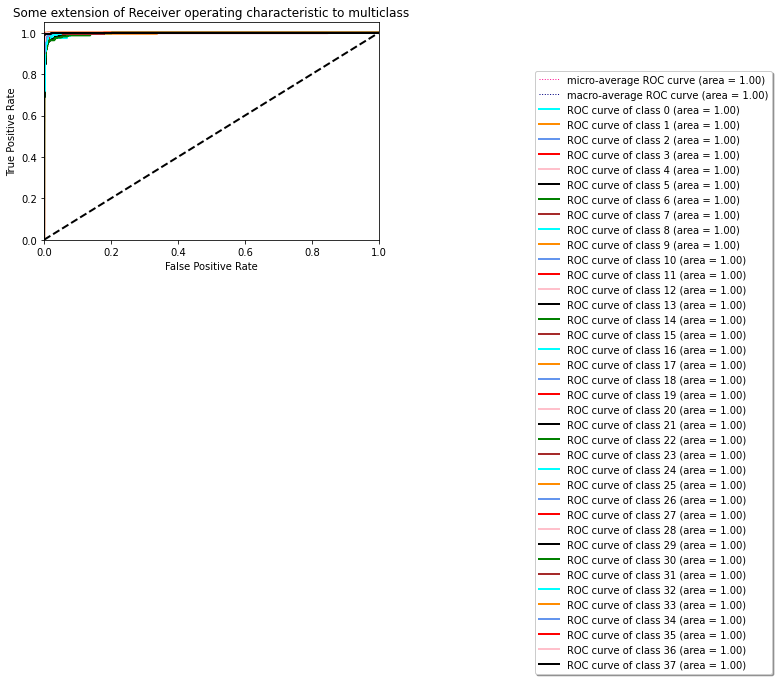

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=38
y_true = label_binarize(y_true, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
n_classes = y_true.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=1,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=1,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue","red","pink","black","green","brown"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        linewidth=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
    

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
#plt.legend(loc="lower right")
plt.legend(loc='upper left', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()